In [223]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False # 设置负号显示正常

%config InlineBackend.figure_format = 'svg' # 设置图像清晰度

order_df = pd.read_excel(f"E:\Python\data_analys\data_analys\某电商平台2021年订单数据.xlsx",index_col="id")
order_df.head(5) # 查看前5行数据

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\22746\AppData\Local\Temp\ipykernel_17092\1038555581.py:8: SyntaxWarning: invalid escape sequence '\P'
  order_df = pd.read_excel(f"E:\Python\data_analys\data_analys\某电商平台2021年订单数据.xlsx",index_col="id")


,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2020-254118088,customer-157213,JDG-00006491,495.67,495.67,渠道-39,APP,2020-02-14 12:20:36,2021-02-28 13:38:41,False
2,sys-2020-263312190,customer-191121,JDG-00058390,634.04,634.04,渠道-76,微 信,2020-08-14 09:40:34,2021-01-01 14:47:14,True
3,sys-2020-188208169,customer-211918,JDG-00008241,953.73,939.28,渠道-53,薇·信,2020-11-02 20:17:25,2021-01-19 20:06:35,False
4,sys-2020-203314910,customer-201322,JDG-00030253,857.54,760.15,渠道-53,WEB,2020-11-19 10:36:39,2021-08-07 12:24:35,False
5,sys-2020-283989279,customer-120872,JDG-00029046,803.87,795.61,渠道-52,APP,2020-12-26 11:19:16,2021-10-01 07:42:43,False


In [224]:
order_df.info() # 查看数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


In [225]:
# 删除非2021年的数据
index = order_df[order_df["payTime"].dt.year != 2021].index
order_df.drop(index = index,inplace = True)
order_df.shape

(104279, 10)

In [226]:
# 重命名列名
order_df.rename(columns={"chanelID":"channelID","platfromType":"platformType"},inplace = True)
order_df.info() # 查看数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
Index: 104279 entries, 1 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104279 non-null  object        
 1   userID        104279 non-null  object        
 2   goodsID       104279 non-null  object        
 3   orderAmount   104279 non-null  float64       
 4   payment       104279 non-null  float64       
 5   channelID     104271 non-null  object        
 6   platformType  104279 non-null  object        
 7   orderTime     104279 non-null  datetime64[ns]
 8   payTime       104279 non-null  datetime64[ns]
 9   chargeback    104279 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


In [227]:
# 处理业务流程不符的数据（支付时间早于下单时间）
order_df.drop(index=order_df[order_df["payTime"] < order_df["orderTime"]].index,inplace=True)
order_df.info() # 查看数据类型和缺失值情况
order_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 104274 entries, 1 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104274 non-null  object        
 1   userID        104274 non-null  object        
 2   goodsID       104274 non-null  object        
 3   orderAmount   104274 non-null  float64       
 4   payment       104274 non-null  float64       
 5   channelID     104266 non-null  object        
 6   platformType  104274 non-null  object        
 7   orderTime     104274 non-null  datetime64[ns]
 8   payTime       104274 non-null  datetime64[ns]
 9   chargeback    104274 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


(104274, 10)

In [228]:
# 删除订单金额、支付金额小于0
order_df.drop(index=order_df[(order_df["orderAmount"] < 0) | (order_df["payment"] < 0)].index,inplace=True)
order_df.shape

(104264, 10)

In [229]:
# 支付时间超过30min
order_df.drop(index = order_df[order_df["payTime"] - order_df["orderTime"] > pd.Timedelta(minutes=30)].index,inplace=True)
order_df.shape
order_df.info() # 查看数据类型和缺失值情况

<class 'pandas.core.frame.DataFrame'>
Index: 103344 entries, 6 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103344 non-null  object        
 1   userID        103344 non-null  object        
 2   goodsID       103344 non-null  object        
 3   orderAmount   103344 non-null  float64       
 4   payment       103344 non-null  float64       
 5   channelID     103336 non-null  object        
 6   platformType  103344 non-null  object        
 7   orderTime     103344 non-null  datetime64[ns]
 8   payTime       103344 non-null  datetime64[ns]
 9   chargeback    103344 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.0+ MB


In [230]:
# 处理渠道为空的数据（填充众数）
order_df["channelID"].fillna(order_df["channelID"].mode()[0],inplace=True) # [0] 取第一个众数值（如果有多个众数）
order_df.info() # 查看数据类型和缺失值情况


<class 'pandas.core.frame.DataFrame'>
Index: 103344 entries, 6 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103344 non-null  object        
 1   userID        103344 non-null  object        
 2   goodsID       103344 non-null  object        
 3   orderAmount   103344 non-null  float64       
 4   payment       103344 non-null  float64       
 5   channelID     103344 non-null  object        
 6   platformType  103344 non-null  object        
 7   orderTime     103344 non-null  datetime64[ns]
 8   payTime       103344 non-null  datetime64[ns]
 9   chargeback    103344 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.0+ MB


C:\Users\22746\AppData\Local\Temp\ipykernel_17092\2955821180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_df["channelID"].fillna(order_df["channelID"].mode()[0],inplace=True) # [0] 取第一个众数值（如果有多个众数）


In [231]:
# 处理平台类型字段（处理异常值）
platformType = order_df["platformType"].replace(r'[\s·]','',regex=True) # 去除空格和小数点
# 查看平台去重数据
# platformType.unique() # 查看去重数据
platformType = platformType.str.title()
# 查看去重数据
# platformType.unique() # 查看去重数据
order_df["platformType"] = platformType.replace(['薇信','Vx','网页','网站'],['微信','微信','Web','Web'])
# order_df["platformType"].unique() # 查看去重数据


In [232]:
# 添加折扣字段，处理折旧>1的数据，并将支付金额=订单金额*平均折扣

order_df["discount"] =  order_df["payment"] / order_df["orderAmount"]
mead_discount = order_df[order_df["discount"]<=1]["discount"].mean()
mead_discount
# order_df.head(20)

np.float64(0.9389702485891127)

In [233]:
import numpy as np

order_df["payment"] = np.round(order_df["payment"].where(order_df["discount"]<=1,order_df["orderAmount"] * mead_discount),2)
order_df["discount"] = order_df["payment"] / order_df["orderAmount"]
order_df.head(20)


,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount
id,,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微信,2021-01-01 00:12:23,2021-01-01 00:13:37,False,1.000000
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,微信,2021-01-01 00:23:06,2021-01-01 00:23:32,False,0.968743
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微信,2021-01-01 01:05:50,2021-01-01 01:06:17,False,0.977320
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,App,2021-01-01 01:16:12,2021-01-01 01:16:25,False,0.954522
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False,1.000000
11,sys-2021-417411381,customer-181957,JDG-00048356,271.45,271.45,渠道-00,App,2021-01-01 01:36:17,2021-01-01 01:36:56,False,1.000000
12,sys-2021-254286596,customer-174586,JDG-00032245,827.13,827.13,渠道-28,微信,2021-01-01 01:37:00,2021-01-01 01:37:14,False,1.000000
13,sys-2021-303647260,customer-178023,JDG-00068545,1302.55,1246.52,渠道-76,App,2021-01-01 02:11:23,2021-01-01 02:12:56,False,0.956984
14,sys-2021-347419495,customer-209896,JDG-00048355,652.87,598.84,渠道-39,App,2021-01-01 02:31:13,2021-01-01 02:32:40,False,0.917242


In [234]:
# 数据分析和呈现
# 1.交易总金额GMV、总销售额、实际销售额、退货率、客单价（全年）
total_gmv = order_df["orderAmount"].sum()/10000 # GMV
total_pay = order_df["payment"].sum()/10000 # 总销售额
total_rev = order_df.query("not chargeback")["payment"].sum()/10000 # 实际销售额
print(f"GMV: {total_gmv:.2f}万元")
print(f"总销售额: {total_pay:.2f}万元")
print(f"实际销售额: {total_rev:.2f}万元")

GMV: 12709.88万元
总销售额: 12122.65万元
实际销售额: 10509.44万元


In [235]:
back_ratio = order_df.query("chargeback")["orderID"].nunique() / order_df["orderID"].nunique() # 拒退率
# 付费用户平均收益：ARPU（Average Revenue Per Paid User）= 总销售额 / 付费用户数
arppu = total_pay / order_df["userID"].nunique() # 客单价
print(f"拒退率:{back_ratio * 100:.2f}%")
print(f"客单价:{arppu*10000:.2f}元")

拒退率:13.18%
客单价:1541.34元


In [236]:
# 新增月份和季度字段,月份格式为1月，季度格式为Q1
order_df["month"] = order_df["orderTime"].dt.month.apply(lambda x: str(x) + "月")
order_df["quarter"] = order_df["orderTime"].dt.quarter.apply(lambda x: "Q" + str(x))
order_df


,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,discount,month,quarter
id,,,,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微信,2021-01-01 00:12:23,2021-01-01 00:13:37,False,1.000000,1月,Q1
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,微信,2021-01-01 00:23:06,2021-01-01 00:23:32,False,0.968743,1月,Q1
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微信,2021-01-01 01:05:50,2021-01-01 01:06:17,False,0.977320,1月,Q1
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,App,2021-01-01 01:16:12,2021-01-01 01:16:25,False,0.954522,1月,Q1
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False,1.000000,1月,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2021-344079195,customer-182248,JDG-00081381,1029.81,964.59,渠道-89,微信,2021-12-31 23:32:55,2021-12-31 23:33:06,False,0.936668,12月,Q4
104298,sys-2021-296195955,customer-143322,JDG-00093851,1731.61,1580.83,渠道-00,App,2021-12-31 23:33:05,2021-12-31 23:34:36,True,0.912925,12月,Q4
104299,sys-2021-382387725,customer-220484,JDG-00078257,3624.84,3571.55,渠道-53,Web,2021-12-31 23:37:30,2021-12-31 23:37:44,False,0.985299,12月,Q4


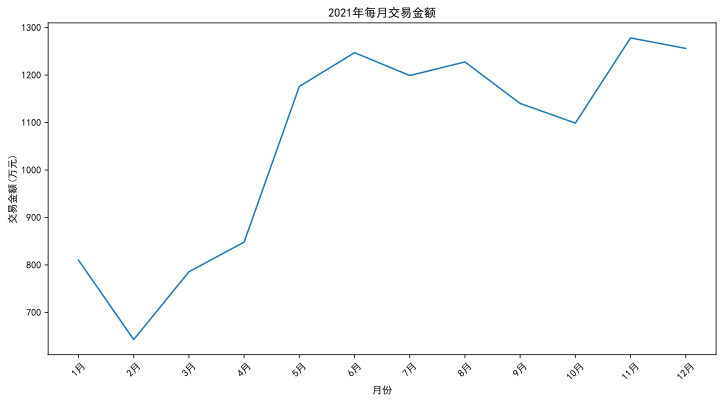

In [237]:

# 月交易金额折线图
ser = np.round(order_df.groupby("month")["orderAmount"].sum()/10000,2) # 交易金额
# ser = ser.sort_index(key = lambda x: x.str.extract('(\d+)').astype(int)) # 按1月、2月...份排序
# 报错:x.str.extract('(\d+)') 返回的是一个 DataFrame（二维结构），而 sort_index(key=...) 需要一维数据。
ser = ser.iloc[pd.to_numeric(ser.index.str.replace('月','')).argsort()]

plt.figure(figsize=(12,6))
plt.plot(ser.index,ser.values)
plt.title("2021年每月交易金额")
plt.xlabel("月份")
plt.ylabel("交易金额(万元)")
plt.xticks(rotation=45)
plt.show()





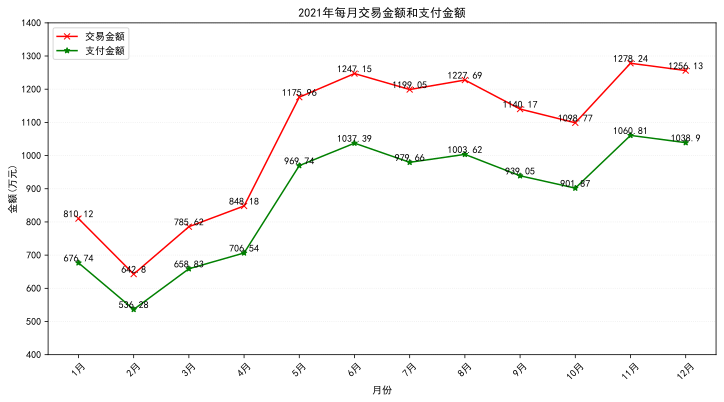

In [238]:
ser1 = round(order_df.groupby('month')['orderAmount'].sum()/10000,2) # 交易金额
ser2 = round(order_df.query('not chargeback').groupby('month')['payment'].sum()/10000,2) # 支付金额

ser1 = ser1.iloc[pd.to_numeric(ser1.index.str.replace('月','')).argsort()]
ser2 = ser2.iloc[pd.to_numeric(ser2.index.str.replace('月','')).argsort()]

plt.figure(figsize = (12,6))
plt.plot(ser1.index,ser1.values,marker = 'x',color='red',label = "交易金额")
plt.plot(ser2.index,ser2.values,marker = '*',color='green',label = "支付金额")
for index in ser1.index:
    plt.text(index,ser1[index],ser1[index],ha='center',va='bottom')
for index in ser2.index:
    plt.text(index,ser2[index],ser2[index],ha='center',va='bottom')
plt.yticks(np.arange(400,1401,100))
plt.xticks(ser1.index,rotation=45)
plt.legend()
plt.grid(axis = 'y',linestyle = ':',alpha = 0.25)
plt.title("2021年每月交易金额和支付金额")
plt.xlabel("月份")
plt.ylabel("金额(万元)")
plt.show()

In [239]:
order_df["month"]=order_df.orderTime.dt.month
order_df["quater"]=order_df.orderTime.dt.quarter

In [240]:
qua_pay = order_df.query("not chargeback").groupby("quater")["payment"].sum()/10000
qua_user = order_df.query("not chargeback").groupby("quater")["userID"].nunique()  
user_price = qua_pay / qua_user
print(user_price)

quater
1    0.130270
2    0.123850
3    0.126651
4    0.121492
dtype: float64


In [241]:
pd.pivot_table(order_df,index = "quater",values = "payment",aggfunc = "sum")
# 2.按季度统计交易金额、支付金额、实际销售额

,payment
quater,
1,21648102.81
2,31231225.73
3,33712537.91
4,34634671.17


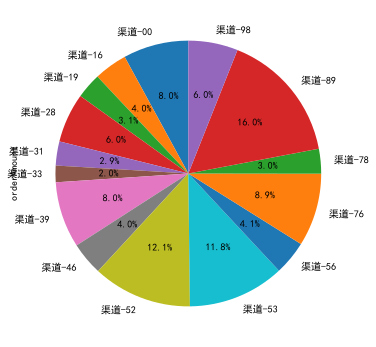

In [242]:
channel_gmv = order_df.groupby("channelID")["orderAmount"].sum()/10000
channel_gmv.plot(kind= 'pie'
                 ,autopct = '%.1f%%',figsize = (12,6),startangle = 90)
plt.show()

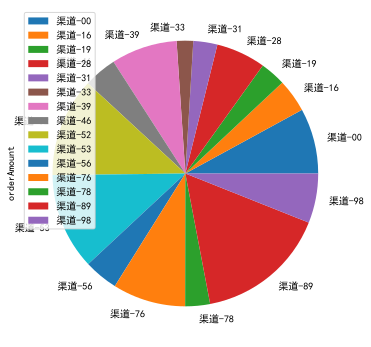

In [243]:
tem_df = pd.pivot_table(order_df,index = "channelID",values = "orderAmount",aggfunc = "sum")
tem_df.plot(kind = "pie",y='orderAmount',figsize = (12,6),color = "orange")
plt.show()

In [244]:
# 周一到周日哪天下单量最多
order_df["week"] = order_df["orderTime"].dt.day_name() # 获取星期几
# 按照星期几的顺序升序
order_df["week"] = order_df["week"].astype(pd.CategoricalDtype(categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],ordered=True))
order_df.groupby("week")["orderID"].nunique()


C:\Users\22746\AppData\Local\Temp\ipykernel_17092\3218257969.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_df.groupby("week")["orderID"].nunique()


week
Monday       13119
Tuesday      14303
Wednesday    15262
Thursday     16551
Friday       16521
Saturday     14446
Sunday       13141
Name: orderID, dtype: int64

<Axes: xlabel='hour'>

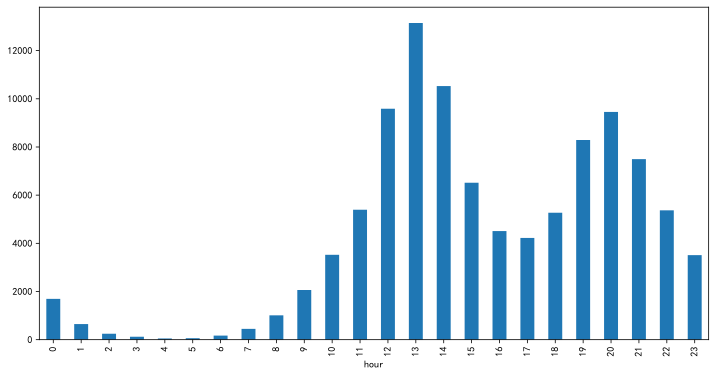

In [245]:
# 计算每个时段的下单量
order_df["hour"] = order_df["orderTime"].dt.hour # 获取小时

order_df.groupby("hour")["orderID"].nunique().plot(kind = "bar",figsize = (12,6))

<Axes: xlabel='time'>

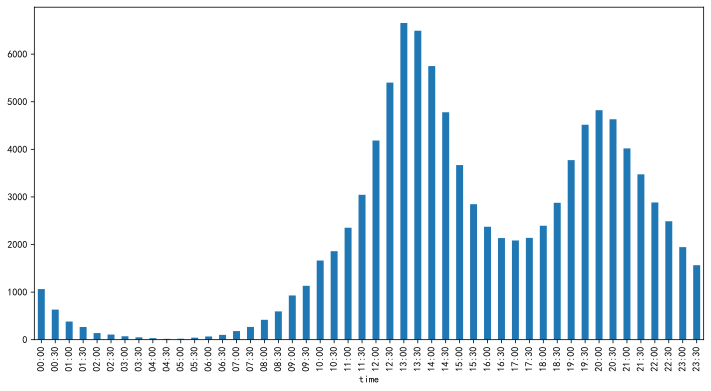

In [246]:
# 计算每个时段的下单量，以半小时为一个单位
order_df["time"] = order_df["orderTime"].dt.floor("30min").dt.strftime("%H:%M")# 向下取整到30分钟
order_df.groupby("time")["orderID"].nunique().plot(kind = "bar",figsize = (12,6))

In [247]:
# 以月为时间窗口，计算用户复购率
# 函数定义：如果value值大于1,则赋值1，否则赋值0
def handel_value(values):
    if ~np.isnan(values):
        return 1 if values > 1 else 0
    return values

tem_df = pd.pivot_table(order_df,index = 'userID',columns='month',values='orderID',aggfunc='count')
tem_df = tem_df.applymap(handel_value) # 处理数据
# 计算复购率,百分数格式
fougou_ratio = round(tem_df.sum() / tem_df.count() * 100,2)
fougou_ratio

C:\Users\22746\AppData\Local\Temp\ipykernel_17092\2888859010.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tem_df = tem_df.applymap(handel_value) # 处理数据


month
1     1.83
2     1.14
3     1.74
4     2.02
5     3.05
6     3.05
7     2.52
8     3.16
9     2.47
10    2.79
11    2.91
12    3.08
dtype: float64

In [248]:
# # 用户价值分层（RFM模型）
# # 1.计算RFM值
# # 计算RFM值
# order_df["recency"] = (order_df["orderTime"].max() - order_df["orderTime"]).dt.days # 最近一次下单时间
# order_df["frequency"] = order_df.groupby("userID")["orderID"].transform("count") # 下单频率
# order_df["monetary"] = order_df.groupby("userID")["payment"].transform("sum") # 下单金额
# order_df["recency"] = order_df["recency"].astype(int) # 转换为整数
# order_df["frequency"] = order_df["frequency"].astype(int) # 转换为整数
# order_df["monetary"] = order_df["monetary"].astype(int) # 转换为整数
# order_df["recency"].describe() # 查看recency的描述性统计
# order_df["frequency"].describe() # 查看frequency的描述性统计
# order_df["monetary"].describe() # 查看monetary的描述性统计
# # 2.计算RFM值的分位数
# # 自动确定可用的分位数数量，避免标签数量与分箱数量不一致的错误
# def safe_qcut(series, q, labels):
# 	try:
# 		return pd.qcut(series, q, labels=labels[:q], duplicates='drop')
# 	except ValueError:
# 		# 如果唯一值太少，自动减少分箱数
# 		n_unique = series.nunique()
# 		bins = min(q, n_unique)
# 		# pd.qcut要求labels数量等于bins-1
# 		if bins > 1:
# 			return pd.qcut(series, bins, labels=labels[:bins-1], duplicates='drop')
# 		else:
# 			# 如果唯一值只有1个，全部赋同一个标签
# 			return pd.Series([labels[0]] * len(series), index=series.index)

# recency_quartile = safe_qcut(order_df["recency"], 4, labels=[4,3,2,1]) # 最近一次下单时间
# frequency_quartile = safe_qcut(order_df["frequency"], 4, labels=[1,2,3,4]) # 下单频率
# monetary_quartile = safe_qcut(order_df["monetary"], 4, labels=[1,2,3,4]) # 下单金额
# # 3.计算RFM值
# order_df["RFM"] = recency_quartile.astype(str) + frequency_quartile.astype(str) + monetary_quartile.astype(str) # RFM值
# order_df["RFM"].value_counts().sort_index(ascending=False) # 查看RFM值的分布情况
# # 4.计算RFM值的分布情况
# order_df["RFM"].value_counts().sort_index(ascending=False).plot(kind="bar",figsize=(12,6))
# plt.title("RFM值分布情况")
# plt.xlabel("RFM值")
# plt.ylabel("用户数量")
# plt.xticks(rotation=45)
# plt.show()


In [249]:
# 用户价值分层（RFM模型）

tem_df = pd.pivot_table(
    order_df.query("not chargeback"),
    index='userID',
    values=['orderTime', 'orderID', 'payment'],
    aggfunc={'orderTime': 'max', 'orderID': 'count', 'payment': 'sum'}
)
tem_df.columns = ['frequency', 'recency', 'monetary']  # 可选：重命名列名为RFM
tem_df



,frequency,recency,monetary
userID,,,
customer-100000,1,2021-10-13 18:46:46,2109.52
customer-100003,1,2021-05-24 13:04:05,870.17
customer-100006,1,2021-11-14 15:37:19,523.02
customer-100007,1,2021-01-14 18:45:35,2244.56
customer-100008,1,2021-11-16 17:15:03,5018.60
...,...,...,...
customer-299980,1,2021-10-18 10:53:37,644.00
customer-299983,1,2021-12-27 17:57:11,949.91
customer-299989,2,2021-11-11 10:40:08,2026.52


In [250]:
from datetime import datetime

last_day = datetime(2021,12,31) # 2021年最后一天
tem_df["recency"] = (last_day - tem_df["recency"]).dt.days # 最近一次下单时间
tem_df

,frequency,recency,monetary
userID,,,
customer-100000,1,78,2109.52
customer-100003,1,220,870.17
customer-100006,1,46,523.02
customer-100007,1,350,2244.56
customer-100008,1,44,5018.60
...,...,...,...
customer-299980,1,73,644.00
customer-299983,1,3,949.91
customer-299989,2,49,2026.52


tag
000    23405
001    15034
010      597
011     6862
100    10349
101     5859
110      611
111     7887
Name: tag, dtype: int64


C:\Users\22746\AppData\Local\Temp\ipykernel_17092\1735427019.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = (tem_df >= tem_df.mean()).applymap(lambda x: '1' if x else '0' )


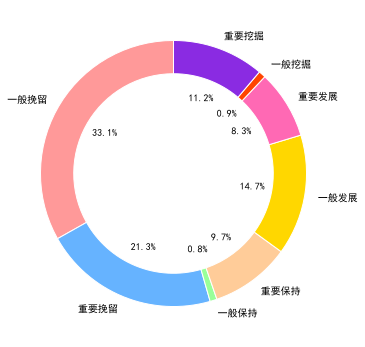

In [251]:
def recency_score(x):
    if x <= 7:
        return 5
    elif x <= 20:
        return 4
    elif x <= 50:
        return 3
    elif x <= 90:
        return 2
    else:
        return 1
tem_df["recency"] = tem_df["recency"].apply(recency_score)
tem_df["frequency"] = tem_df["frequency"].apply(lambda x: 4 if x >= 4 else x) # 下单频率
tem_df["monetary"] = tem_df["monetary"].apply(lambda x: 4 if x >= 1000 else (3 if x >= 500 else (2 if x >= 200 else (1 if x >= 100 else 0)))) # 下单金额
result_df = (tem_df >= tem_df.mean()).applymap(lambda x: '1' if x else '0' )
result_df['tag'] = result_df['recency'] + result_df['frequency'] + result_df['monetary']
ser = result_df.groupby("tag")["tag"].count()
print(ser)
ser.plot(figsize=(6,6),kind="pie"
         ,labels= ['一般挽留','重要挽留','一般保持','重要保持','一般发展','重要发展','一般挖掘','重要挖掘']
         ,autopct='%.1f%%',startangle=90 
         ,colors=['#FF9999','#66B3FF','#99FF99','#FFCC99','#FFD700','#FF69B4','#FF4500','#8A2BE2']
         ,wedgeprops={'edgecolor': 'w','width':0.25} # 设置边框颜色
         )
plt.ylabel('')
plt.show()